# Gradient Boosting - Lab

## Introduction

In this lab, we'll learn how to use both Adaboost and Gradient Boosting classifiers from scikit-learn!

## Objectives

You will be able to:

- Use AdaBoost to make predictions on a dataset 
- Use Gradient Boosting to make predictions on a dataset 

## Getting Started

In this lab, we'll learn how to use boosting algorithms to make classifications on the [Pima Indians Dataset](http://ftp.ics.uci.edu/pub/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names). You will find the data stored in the file `'pima-indians-diabetes.csv'`. Our goal is to use boosting algorithms to determine whether a person has diabetes. Let's get started!

We'll begin by importing everything we need for this lab. Run cell below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Now, use Pandas to import the data stored in `'pima-indians-diabetes.csv'` and store it in a DataFrame. Print the first five rows to inspect the data we've imported and ensure everything loaded correctly. 

In [2]:
# Import the data
df = pd.read_csv('pima-indians-diabetes.csv')

# Print the first five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Cleaning, exploration, and preprocessing

The target we're trying to predict is the `'Outcome'` column. A `1` denotes a patient with diabetes. 

By now, you're quite familiar with exploring and preprocessing a dataset.  

In the following cells:

* Check for missing values and deal with them as you see fit (if any exist) 
* Count the number of patients with and without diabetes in this dataset 
* Store the target column in a separate variable and remove it from the dataset
* Split the dataset into training and test sets, with a `test_size` of 0.25 and a `random_state` of 42

In [3]:
# Check for missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Number of patients with and without diabetes
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

There are no missing values in the dataframe. 500 patients have diabetes while 268 do not.

In [5]:
target = df['Outcome']
df = df.drop('Outcome', axis = 1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

## Train the models

Now that we've explored the dataset, we're ready to fit some models!

In the cell below:

* Instantiate an `AdaBoostClassifier` (set the `random_state` for 42)
* Instantiate a `GradientBoostingClassifer` (set the `random_state` for 42) 

In [7]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

Now, fit the training data to both the classifiers: 

In [8]:
# Fit AdaBoostClassifier
adaboost_clf.fit(df, target)

AdaBoostClassifier(random_state=42)

In [9]:
# Fit GradientBoostingClassifier
gbt_clf.fit(df, target)

GradientBoostingClassifier(random_state=42)

Now, let's use these models to predict labels on both the training and test sets: 

In [10]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

Now, complete the following function and use it to calculate the accuracy and f1-score for each model: 

In [11]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.8315972222222222
F1-Score: 0.7413333333333334

Model: Gradient Boosted Trees
Accuracy: 0.90625
F1-Score: 0.8540540540540541

Testing Metrics
Model: AdaBoost
Accuracy: 0.8020833333333334
F1-Score: 0.7246376811594203

Model: Gradient Boosted Trees
Accuracy: 0.90625
F1-Score: 0.8676470588235295


Let's go one step further and create a confusion matrix and classification report for each. Do so in the cell below: 

[[104  19]
 [ 19  50]]


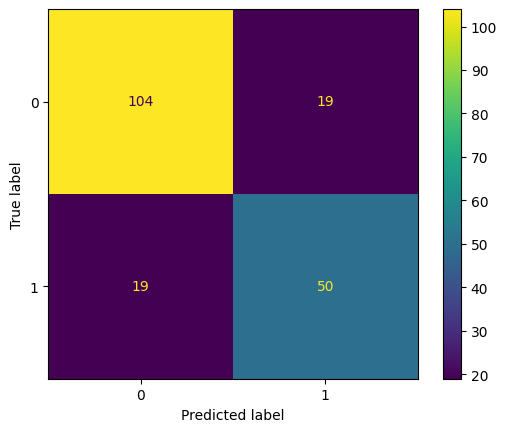

In [12]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
print(adaboost_confusion_matrix)

#plot_confusion_matrix()
disp = ConfusionMatrixDisplay(confusion_matrix = adaboost_confusion_matrix, display_labels= adaboost_clf.classes_)
disp.plot()

[[115   8]
 [ 10  59]]


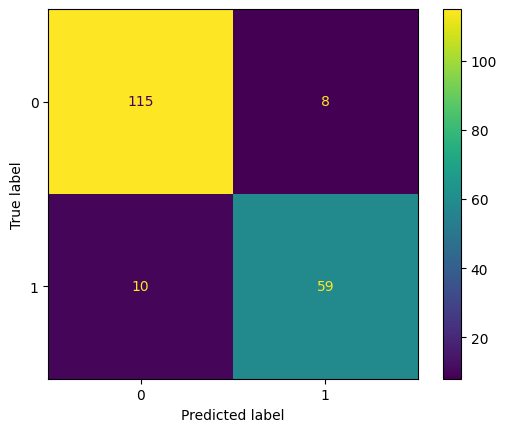

In [13]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
print(gbt_confusion_matrix)

#plot_confusion_matrix()
disp = ConfusionMatrixDisplay(confusion_matrix = gbt_confusion_matrix, display_labels= gbt_clf.classes_)
disp.plot()

In [14]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       123
           1       0.72      0.72      0.72        69

    accuracy                           0.80       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.80      0.80      0.80       192



In [15]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       123
           1       0.88      0.86      0.87        69

    accuracy                           0.91       192
   macro avg       0.90      0.90      0.90       192
weighted avg       0.91      0.91      0.91       192



**_Question:_** How did the models perform? Interpret the evaluation metrics above to answer this question.

Write your answer below this line:
_______________________________________________________________________________________________________________________________
**_Adaboost classifier_**  
1. Had an accuracy of 80% which means that it correctly classifies the patients as either diabetic or non diabetic 80% of the times.


2. Precision:
For class 0 (non-diabetes): Precision is 0.85, meaning 85% of the patients predicted as non-diabetic are truly non-diabetic.
For class 1 (diabetes): Precision is 0.72, meaning 72% of the patients predicted as diabetic are truly diabetic.

3. Recall
For class 0: Recall is 0.85, meaning 85% of the actual non-diabetic patients were correctly identified.
For class 1: Recall is 0.72, meaning 72% of the actual diabetic patients were correctly identified.

4. F1 score
For class 0: F1-score is 0.85, indicating a good balance between precision and recall for non-diabetic patients.
For class 1: F1-score is 0.72, indicating a slightly lower balance for diabetic patients.

**_Gradient boosted tree_**
1. Accuracy score of 91% which means that it correctly classified the patients as either diabetic or non diabetic 91% of the time.

2. Precision
For class 1: precision of 0.88 meaning that 88% of patients predicted to be diabetic are actually diabetic.
For class 0: precision of 0.92, meaning that 92% of patients predicted to be non diabetic are actually non-diabetic.

3. Recall
For class 0: recall of 0.93 meaning that 93% of actual non diabetic patients were correctly identified.
For class 1: recall of 0.86 meaning that 86% of actual diabetic patients were correctly identified.

4. F1 score
For class 0: F1 score of 0.93 indicates that there is a good balance between precision and recall for non diabetic patients.
For cass 1: F1 score of 0.87 indicates a good but slightly lower balance between precision and recall for diabetic patients.


 
 
As a final performance check, let's calculate the 5-fold cross-validated score for each model! 

Recall that to compute the cross-validation score, we need to pass in:

* A classifier
* All training data
* All labels
* The number of folds we want in our cross-validation score  

Since we're computing cross-validation score, we'll want to pass in the entire dataset, as well as all of the labels. 

In the cells below, compute the mean cross validation score for each model. 

In [18]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(np.mean(cross_val_score(adaboost_clf, df, target, cv=5)))
# Expected Output: 0.7631270690094218

Mean Adaboost Cross-Val Score (k=5):
0.7631270690094218


In [23]:
print('Mean GBT Cross-Val Score (k=5):')
print(np.mean(cross_val_score(gbt_clf, df, target, cv = 5)))
# Expected Output: 0.7591715474068416

Mean GBT Cross-Val Score (k=5):
0.7604702487055428


These models didn't do poorly, but we could probably do a bit better by tuning some of the important parameters such as the **_Learning Rate_**. 

## Summary

In this lab, we learned how to use scikit-learn's implementations of popular boosting algorithms such as AdaBoost and Gradient Boosted Trees to make classification predictions on a real-world dataset!